<a href="https://colab.research.google.com/github/H0wAreU/Statistical-Learning-Labs./blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_229351_LAB11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [1]:
!pip install numpy==1.26.4
!pip install pmdarima

In [2]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-18 09:30:37--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.01s   

2025-09-18 09:30:37 (9.27 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [6]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน

In [7]:
dates = pd.read_csv(
    'CM_temp.csv',
    parse_dates=['Date'],
    index_col='Date',
)

print (dates.head())

            MaxTemp
Date               
1998-01-01     30.6
1998-01-02     32.0
1998-01-03     31.6
1998-01-04     32.1
1998-01-05     31.2


In [8]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetim

In [9]:
y = dates['MaxTemp'].resample('M').mean()
print(y)

Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64


/tmp/ipython-input-991211902.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = dates['MaxTemp'].resample('M').mean()


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [10]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ

In [19]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด

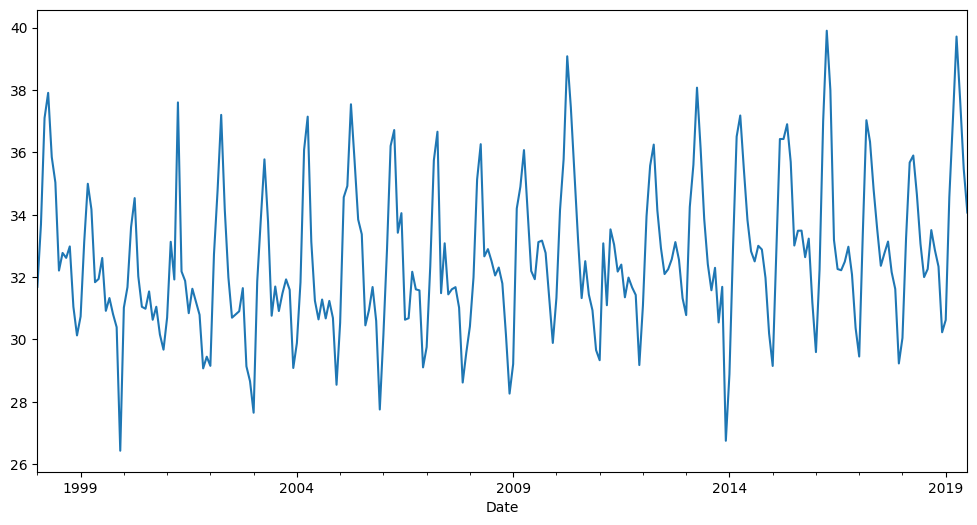

In [11]:
plt.figure(figsize=(12,6))
y.plot();

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])
  print('\n')

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])

In [13]:
KPSStest(y)
ADFtest(y)

KPSS test
Test Statistic:  0.6428439386603282
p-value:  0.018741460121788345
Number of Observations Used:  4
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


ADF test
Test Statistic:  -2.222023197657817
p-value:  0.19834961731512274
#Lags Used:  13
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


In [14]:
print(y)
print(y.shift())


Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64
Date
1998-01-31          NaN
1998-02-28    31.687097
1998-03-31    33.685714
1998-04-30    37.103226
1998-05-31    37.910000
                ...    
2019-03-31    34.564286
2019-04-30    37.051613
2019-05-31    39.716667
2019-06-30    37.680645
2019-07-31    35.466667
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64


## Test stationarity

### KPSS
- $H_0$: data is stationary
- $H_1$: data is **not** stationary


### ADF
- $H_0$: data is **not** stationary
- $H_1$: data is stationary

In [15]:
y_diff = y-y.shift()
y_diff.dropna(inplace=True)

KPSStest(y_diff)
ADFtest(y_diff)

KPSS test
Test Statistic:  0.04516874529942415
p-value:  0.1
Number of Observations Used:  28
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


ADF test
Test Statistic:  -6.227064576112576
p-value:  5.0583827570587737e-08
#Lags Used:  12
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


/tmp/ipython-input-4091943338.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


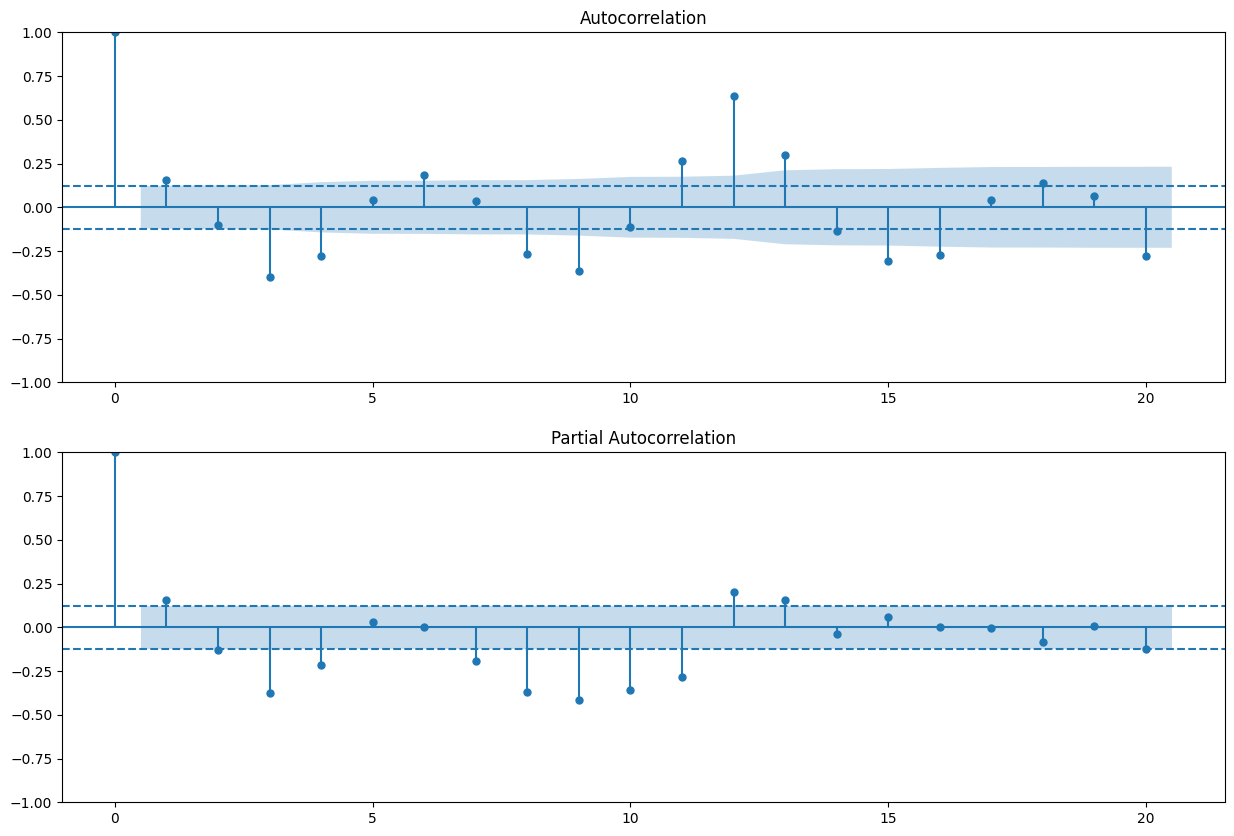

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(y_diff, lags=20, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(y_diff, lags=20, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

In [20]:
train

,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387
...,...
2017-03-31,37.032258
2017-04-30,36.340000
2017-05-31,34.806452


In [53]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,1,3))
arima2 = ARIMA(train, order=(1,1,4))
arima3 = ARIMA(train, order=(1,1,1))
arima4 = ARIMA(train, order=(3,1,3))
arima5 = ARIMA(train, order=(3,1,1))
arima6 = ARIMA(train, order=(3,1,4))

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima1 = SARIMAX(train, order=(1,1,3), seasonal_order=(1, 1, 1, 12))
sarima2 = SARIMAX(train, order=(1,1,4), seasonal_order=(1, 1, 1, 12))
sarima3 = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima4 = SARIMAX(train, order=(3,1,3), seasonal_order=(1, 1, 1, 12))
sarima5 = SARIMAX(train, order=(3,1,1), seasonal_order=(1, 1, 1, 12))
sarima6 = SARIMAX(train, order=(3,1,4), seasonal_order=(1, 1, 1, 12))

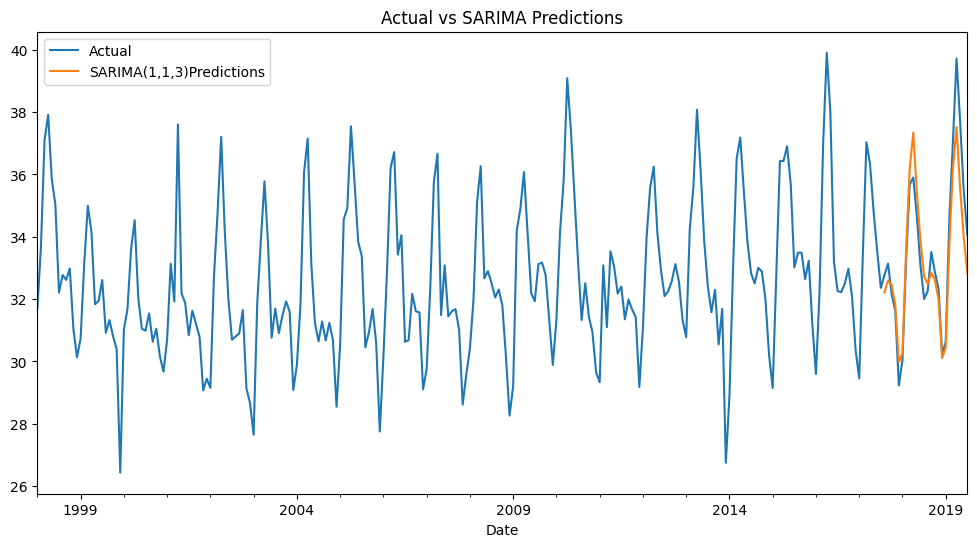

RMSE: 0.9320315986056069


In [60]:
sarima1_fit = sarima1.fit()
yhat = sarima1_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(1,1,3)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_113=rmse(test,yhat)
print('RMSE:',rmse_113)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


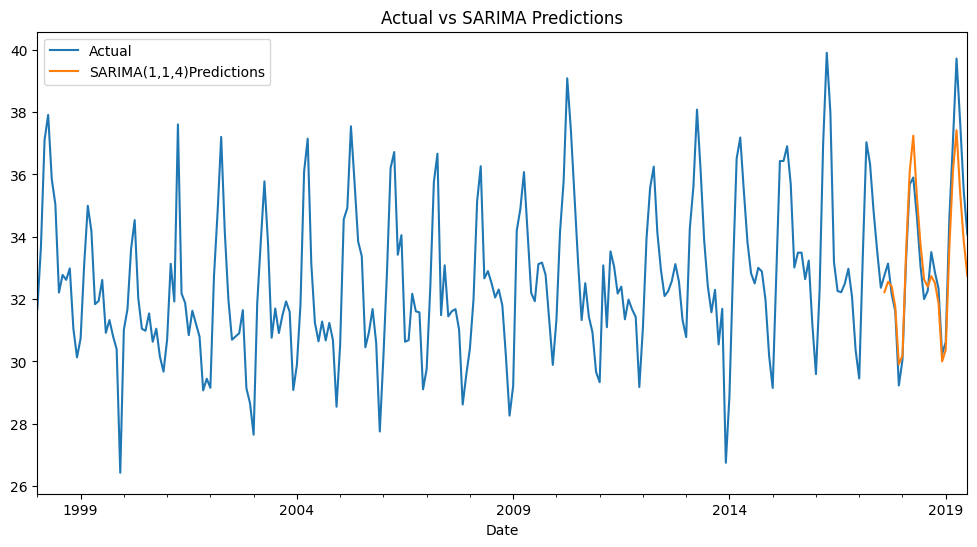

RMSE: 0.9609338671045085


In [61]:
sarima2_fit = sarima2.fit()
yhat = sarima2_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(1,1,4)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_114=rmse(test,yhat)
print('RMSE:',rmse_114)

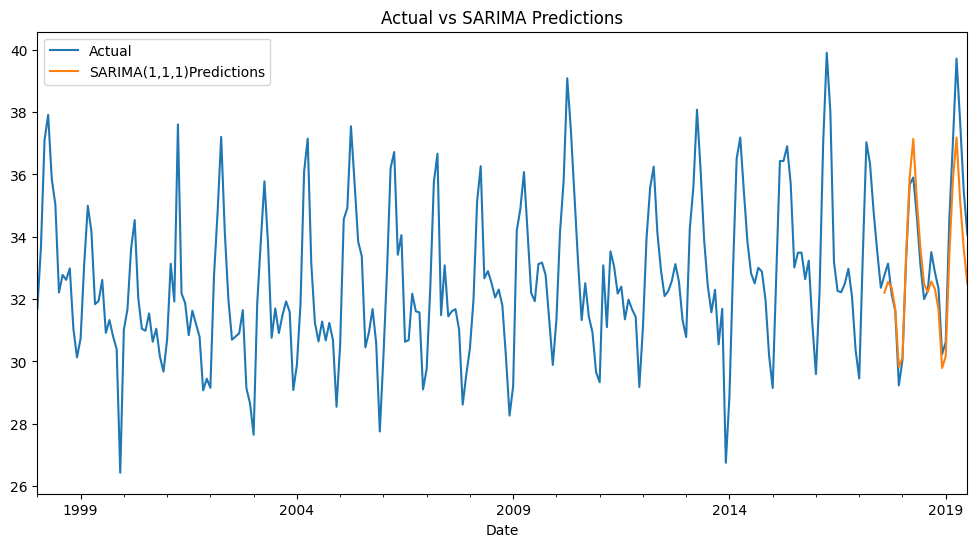

RMSE: 1.0614795072052383


In [62]:
sarima3_fit = sarima3.fit()
yhat = sarima3_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(1,1,1)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_111=rmse(test,yhat)
print('RMSE:',rmse_111)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


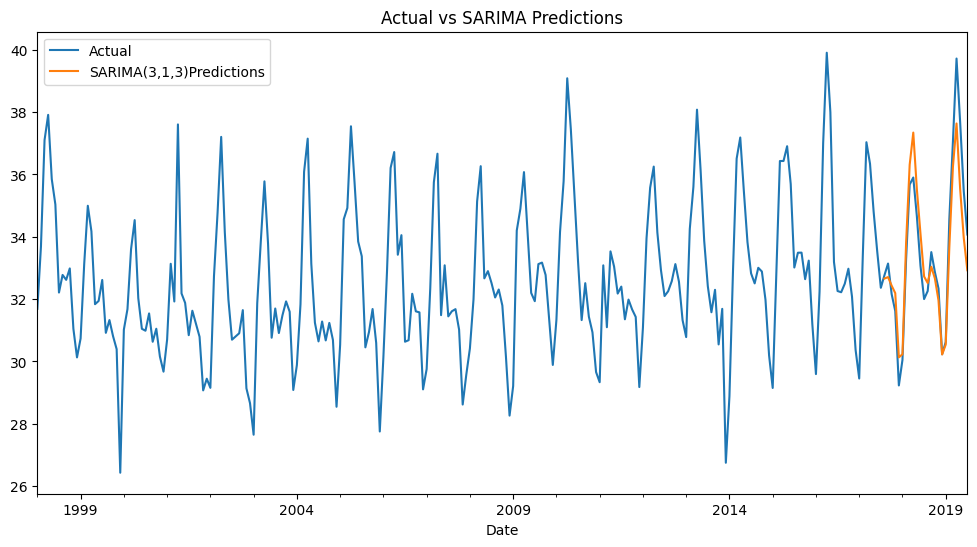

RMSE: 0.9353592629378311


In [63]:
sarima4_fit = sarima4.fit()
yhat = sarima4_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(3,1,3)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_313=rmse(test,yhat)
print('RMSE:',rmse_313)

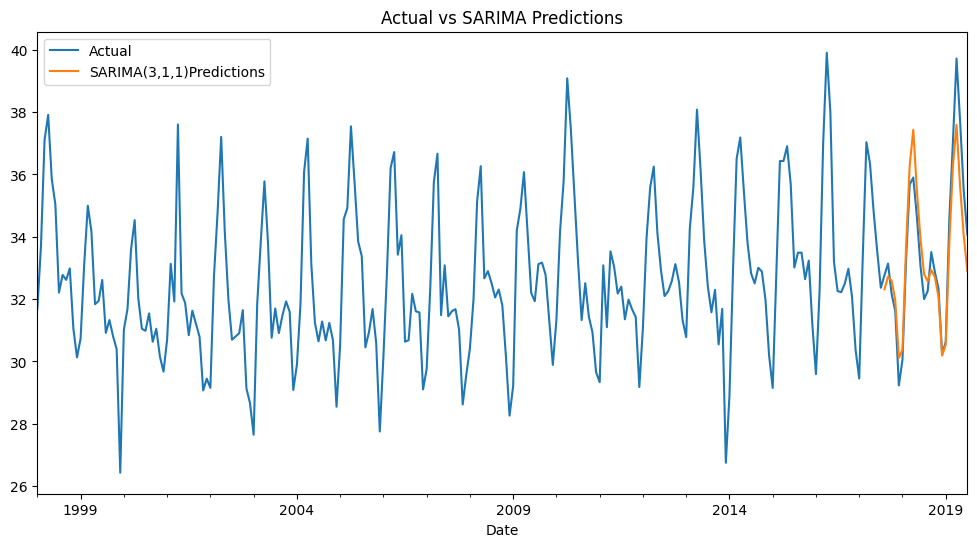

RMSE: 0.9258481324869974


In [64]:
sarima5_fit = sarima5.fit()
yhat = sarima5_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(3,1,1)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_311=rmse(test,yhat)
print('RMSE:',rmse_311)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


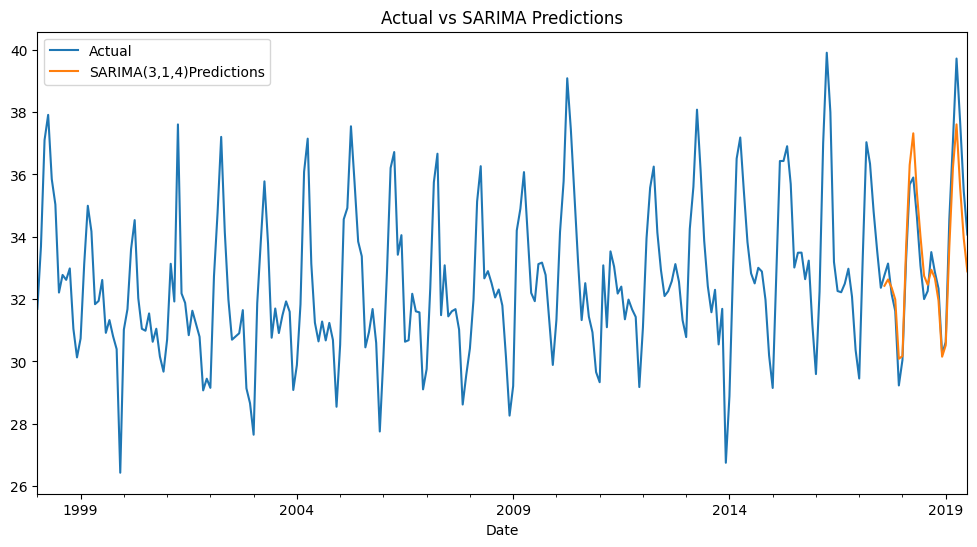

RMSE: 0.9249257884656741


In [65]:
sarima6_fit = sarima6.fit()
yhat = sarima6_fit.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(3,1,4)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_314=rmse(test,yhat)
print('RMSE:',rmse_314)

In [71]:
rmse_values = {
    'SARIMA(1,1,3)': rmse_113,
    'SARIMA(1,1,4)': rmse_114,
    'SARIMA(1,1,1)': rmse_111,
    'SARIMA(3,1,3)': rmse_313,
    'SARIMA(3,1,1)': rmse_311,
    'SARIMA(3,1,4)': rmse_314,
}

rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])
display(rmse_df)

,Model,RMSE
0,"SARIMA(1,1,3)",0.932032
1,"SARIMA(1,1,4)",0.960934
2,"SARIMA(1,1,1)",1.061480
3,"SARIMA(3,1,3)",0.935359
4,"SARIMA(3,1,1)",0.925848
5,"SARIMA(3,1,4)",0.924926


4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

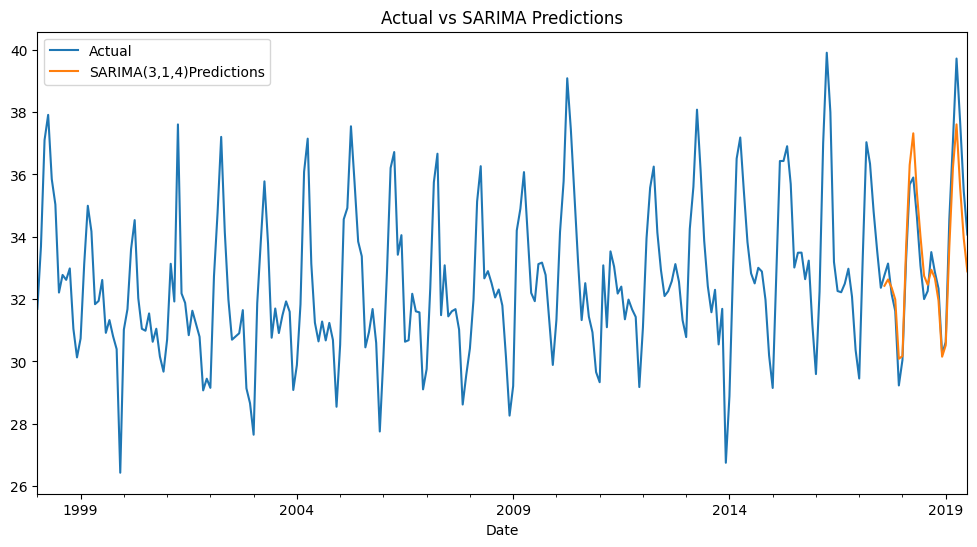

RMSE: 0.9249257884656741


In [72]:
plt.figure(figsize=(12,6))
y.plot(label='Actual')
yhat.plot(label='SARIMA(3,1,4)Predictions')
plt.legend()
plt.title('Actual vs SARIMA Predictions')
plt.show()
rmse_314=rmse(test,yhat)
print('RMSE:',rmse_314)